In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('customer_booking.csv', encoding = 'ISO-8859-1' )
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [17]:
df.shape

(50000, 14)

In [15]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [19]:
df['booking_complete'].value_counts(normalize = True)

booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'num_passengers'}>,
        <Axes: title={'center': 'purchase_lead'}>,
        <Axes: title={'center': 'length_of_stay'}>],
       [<Axes: title={'center': 'flight_hour'}>,
        <Axes: title={'center': 'wants_extra_baggage'}>,
        <Axes: title={'center': 'wants_preferred_seat'}>],
       [<Axes: title={'center': 'wants_in_flight_meals'}>,
        <Axes: title={'center': 'flight_duration'}>,
        <Axes: title={'center': 'booking_complete'}>]], dtype=object)

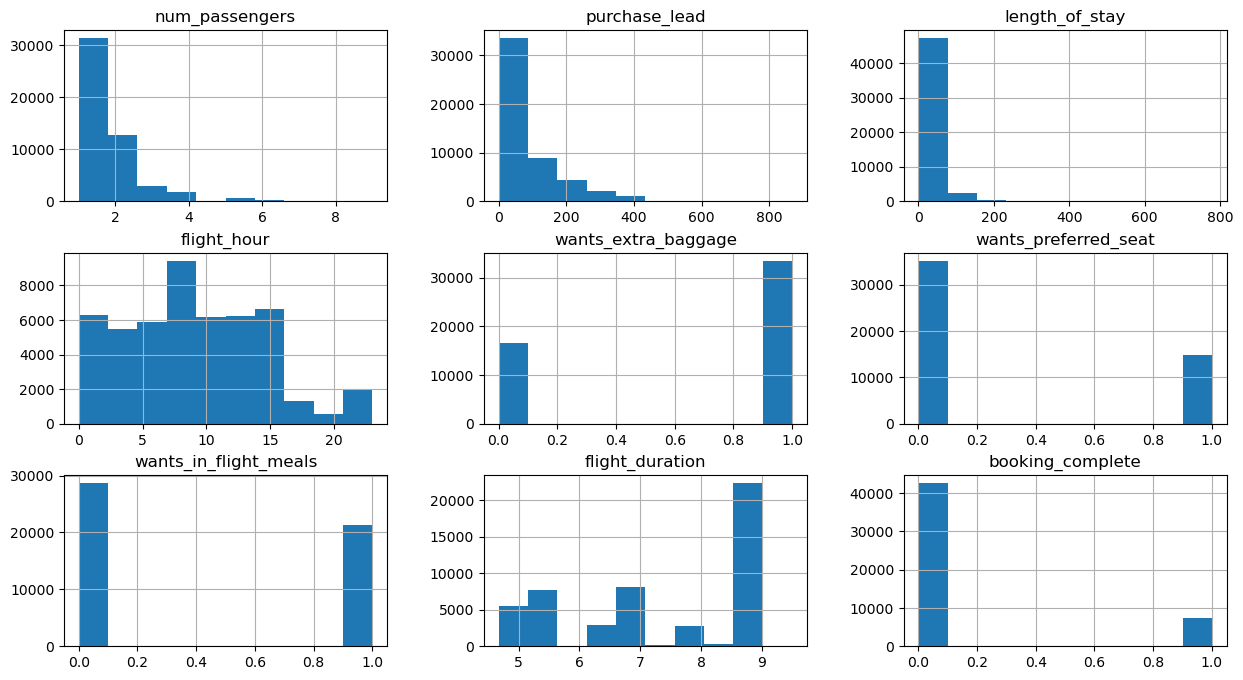

In [25]:
df.hist(figsize = (15,8))

In [27]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [5]:
df = pd.get_dummies(df, columns = ['sales_channel', 'trip_type','flight_day', 'route','booking_origin'], drop_first = True)

In [7]:
X = df.drop(columns ='booking_complete', axis = 1)
y = df['booking_complete']

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 42, stratify = y)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [13]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

log_y_pred = log_model.predict(X_test)

Logaccuarcy_log = accuracy_score(y_test, log_y_pred)
Logclas_report = classification_report(y_test, log_y_pred)
Logcon_mat = confusion_matrix(y_test, log_y_pred)

print(Logaccuarcy_log)
print(Logclas_report)
print(Logcon_mat)

0.8474
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.45      0.09      0.15      1496

    accuracy                           0.85     10000
   macro avg       0.66      0.54      0.53     10000
weighted avg       0.80      0.85      0.80     10000

[[8336  168]
 [1358  138]]


# Random Forest

In [15]:
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
RF_y_pred = RF_model.predict(X_test)

RFaccuarcy_log = accuracy_score(y_test, RF_y_pred)
RFclas_report = classification_report(y_test, RF_y_pred)
RFcon_mat = confusion_matrix(y_test, RF_y_pred)

print(RFaccuarcy_log)
print(RFclas_report)
print(RFcon_mat)

0.8536
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.55      0.12      0.19      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000

[[8362  142]
 [1322  174]]
